In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('ggplot')
import pandas as pd
import seaborn as sns
from collections import Counter

In [2]:
labels_file = pd.read_csv('../data/water_pump_labels.csv').set_index('id')
set_file = pd.read_csv('../data/water_pump_set.csv').set_index('id')
data = pd.concat([set_file, labels_file],axis=1)
#data = data.reset_index().sort_values(['wpt_name', 'date_recorded'], ascending=True).set_index(['wpt_name','date_recorded'])

assert(len(data)==len(labels_file) == len(set_file))
print(data.shape)
print(data.columns)

(59400, 40)
Index(['status_group', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')


In [3]:
data[['waterpoint_type','waterpoint_type_group','extraction_type','extraction_type_group','extraction_type_class','management','management_group','payment','payment_type']].head()

waterpoint_type waterpoint_type_group extraction_type  \
id                                                                         
69572           communal standpipe    communal standpipe         gravity   
8776            communal standpipe    communal standpipe         gravity   
34310  communal standpipe multiple    communal standpipe         gravity   
67743  communal standpipe multiple    communal standpipe     submersible   
19728           communal standpipe    communal standpipe         gravity   

      extraction_type_group extraction_type_class management management_group  \
id                                                                              
69572               gravity               gravity        vwc       user-group   
8776                gravity               gravity        wug       user-group   
34310               gravity               gravity        vwc       user-group   
67743           submersible           submersible        vwc       user-group   
19728               gravity               gravity      other            other   

              payment payment_type  
id                                  
69572    pay annually     annually  
8776        never pay    never pay  
34310  pay per bucket   per bucket  
67743       never pay    never pay  
19728       never pay    never pay

In [4]:
data[['population','public_meeting','scheme_management','scheme_name','permit','water_quality','quality_group','quantity','quantity_group','source','source_type', 'source_class']].head()

population public_meeting scheme_management  \
id                                                   
69572         109           True               VWC   
8776          280            NaN             Other   
34310         250           True               VWC   
67743          58           True               VWC   
19728           0           True               NaN   

                       scheme_name permit water_quality quality_group  \
id                                                                      
69572                        Roman  False          soft          good   
8776                           NaN   True          soft          good   
34310  Nyumba ya mungu pipe scheme   True          soft          good   
67743                          NaN   True          soft          good   
19728                          NaN   True          soft          good   

           quantity quantity_group                source  \
id                                                         
69572        enough         enough                spring   
8776   insufficient   insufficient  rainwater harvesting   
34310        enough         enough                   dam   
67743           dry            dry           machine dbh   
19728      seasonal       seasonal  rainwater harvesting   

                source_type source_class  
id                                        
69572                spring  groundwater  
8776   rainwater harvesting      surface  
34310                   dam      surface  
67743              borehole  groundwater  
19728  rainwater harvesting      surface

In [12]:
data.isnull().sum()

status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

# Data cleaning steps

#### We discovered a number of pumps without any longitude information (set to 0).
#### We also discovered a number of pumps without construction year (set to 0). 
#### The feature "num_private" is not described. Let's just get rid of it.

#### Let's remove those as a data clean-up step.

In [14]:
data = data.loc[data.longitude != 0]
print(data.shape)
low_quality_columns = np.array(data.columns[data.isnull().sum()>10])
data = data.drop(low_quality_columns,axis=1)
data.dropna(inplace=True)
# data = data.loc[data.construction_year != 0]
# print(data.shape)
print(data.shape)
# 
# print(data.shape)

(57588, 40)
(57588, 33)


# Visualise features over geography

In [15]:
bbox = (data.longitude.min(),   data.longitude.max(),      
         data.latitude.min(), data.latitude.max())
bbox

(29.6071219, 40.34519307, -11.64944018, -0.99846435)

<IPython.core.display.Javascript object>


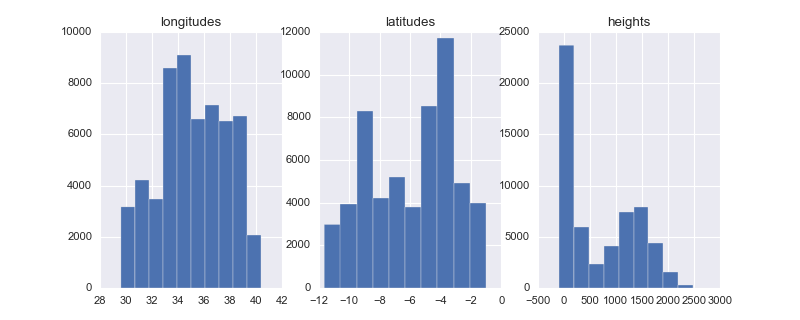

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.hist(data.longitude)
plt.title('longitudes')
plt.subplot(132)
plt.hist(data.latitude)
plt.title('latitudes')
plt.subplot(133)
plt.hist(data.gps_height)
plt.title('heights')

<IPython.core.display.Javascript object>


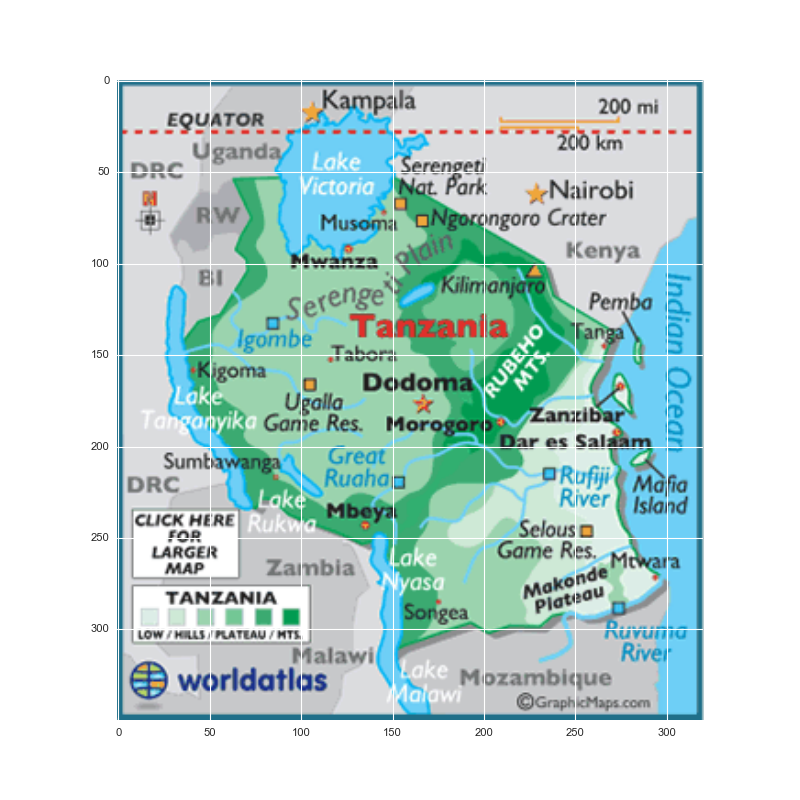

In [17]:
tanzania_geography = plt.imread('../data/tanzania_geography.gif')
plt.figure(figsize=(10,10))
plt.imshow(tanzania_geography)

In [18]:
tanzania_map = plt.imread('../data/tanzania.png')
bbox_map = (25,45,-15,0)

<IPython.core.display.Javascript object>


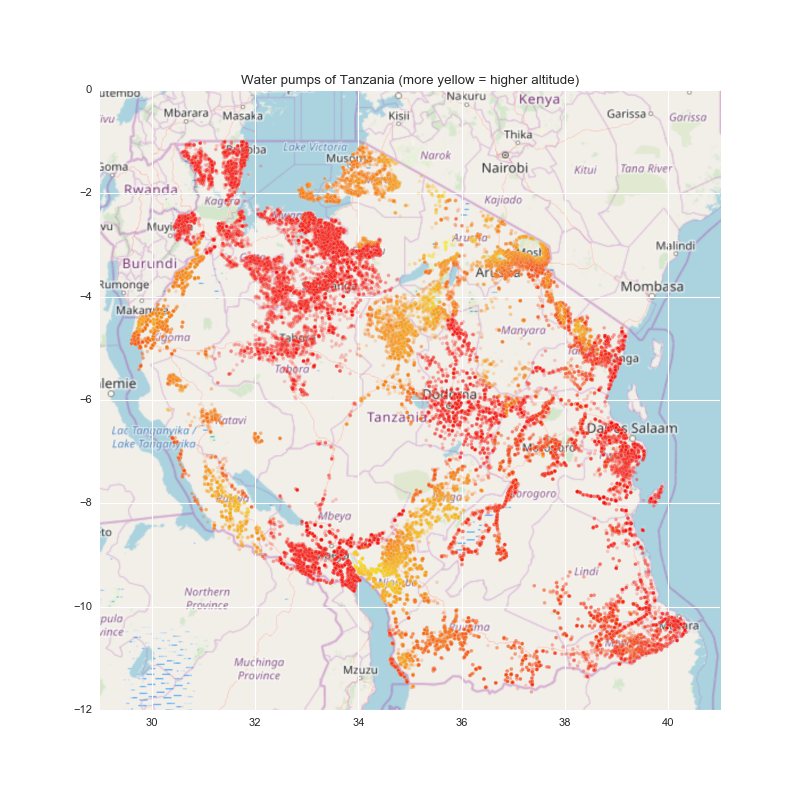

(-12, 0)

In [19]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(data.longitude, data.latitude, zorder=1, alpha= 0.2, c=data.gps_height.as_matrix(), s=10,cmap='autumn')
ax.set_title('Water pumps of Tanzania (more yellow = higher altitude)')
ax.imshow(tanzania_map, zorder=0, extent = bbox_map, aspect= 'equal')
plt.xlim(29,41)
plt.ylim(-12,0)

<IPython.core.display.Javascript object>


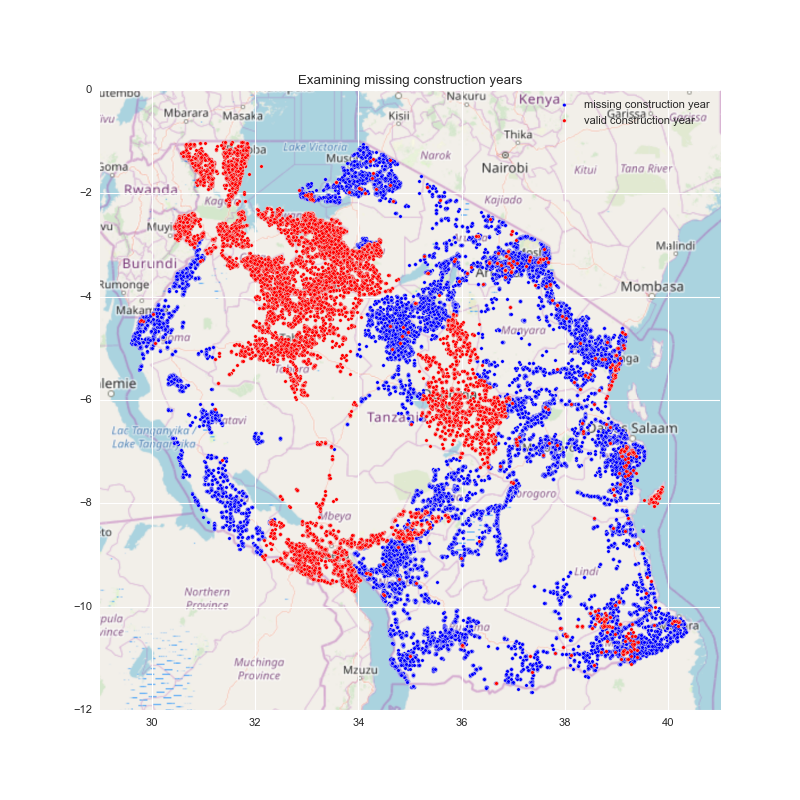

In [20]:
plt.figure(figsize = (10,10))

subset_for_plotting = data[data.construction_year != 0]
plt.scatter(subset_for_plotting.longitude, subset_for_plotting.latitude, c='b', zorder=1,  s=10)

subset_for_plotting = data[data.construction_year == 0]
plt.scatter(subset_for_plotting.longitude, subset_for_plotting.latitude, c='r', zorder=1,  s=10)

plt.title('Examining missing construction years')
plt.imshow(tanzania_map, zorder=0, extent = bbox_map, aspect= 'equal')
plt.xlim(29,41)
plt.ylim(-12,0)
plt.legend(['missing construction year','valid construction year'])

In [21]:
counts_no_year_info = Counter(data[data.construction_year == 0].status_group)
counts_with_year_info = Counter(data[data.construction_year != 0].status_group)
status_enum = counts_no_year_info.keys()
counts_no_year_info = np.array([counts_no_year_info[k] for k in status_enum])
counts_with_year_info = np.array([counts_with_year_info[k] for k in status_enum])
print('Absolute counts for statuses {}'.format(status_enum))
print('\t without year information: {}'.format(counts_no_year_info))
print('\t with year information: {}'.format(counts_with_year_info))

print('\n\nRelative counts for statuses {}'.format(status_enum))
print('\t without year information: {}'.format(counts_no_year_info/np.sum(counts_no_year_info)))
print('\t with year information: {}'.format(counts_with_year_info/np.sum(counts_with_year_info)))

Absolute counts for statuses dict_keys(['non functional', 'functional needs repair', 'functional'])
	 without year information: [7809 1403 9685]
	 with year information: [14459  2528 21704]


Relative counts for statuses dict_keys(['non functional', 'functional needs repair', 'functional'])
	 without year information: [0.4132402  0.07424459 0.51251521]
	 with year information: [0.37370448 0.06533819 0.56095733]


<IPython.core.display.Javascript object>


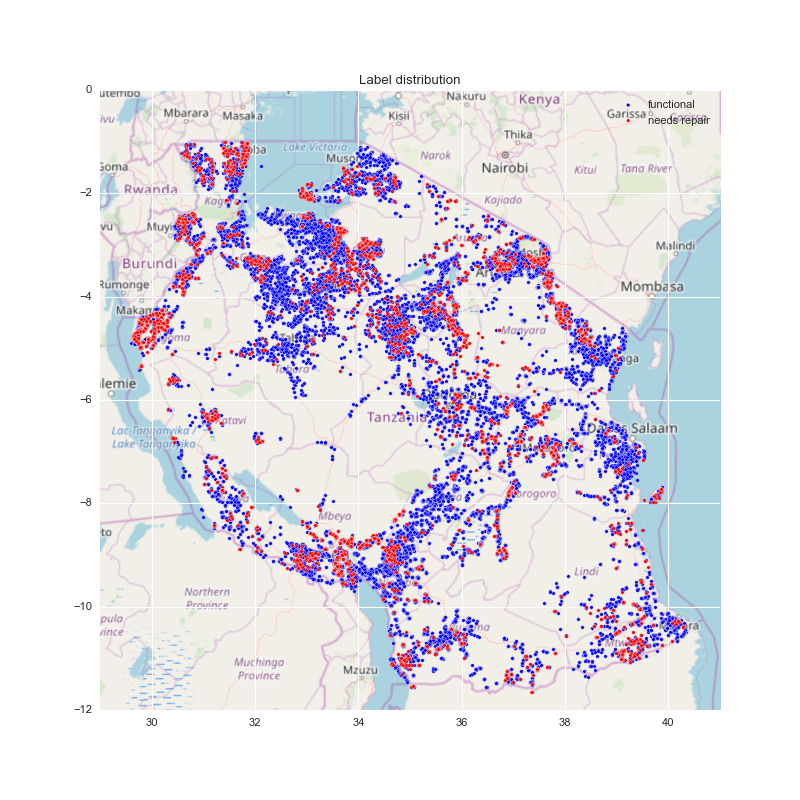

In [22]:
plt.figure(figsize = (10,10))

subset_for_plotting = data[data.status_group == 'functional']
plt.scatter(subset_for_plotting.longitude, subset_for_plotting.latitude, c='b', zorder=1,  s=10)

subset_for_plotting = data[data.status_group == 'functional needs repair']
plt.scatter(subset_for_plotting.longitude, subset_for_plotting.latitude, c='r', zorder=1,  s=10)

plt.title('Label distribution')
plt.imshow(tanzania_map, zorder=0, extent = bbox_map, aspect= 'equal')
plt.xlim(29,41)
plt.ylim(-12,0)
plt.legend(['functional','needs repair'])

# Compare distributions of numerical features to ground truth

<IPython.core.display.Javascript object>


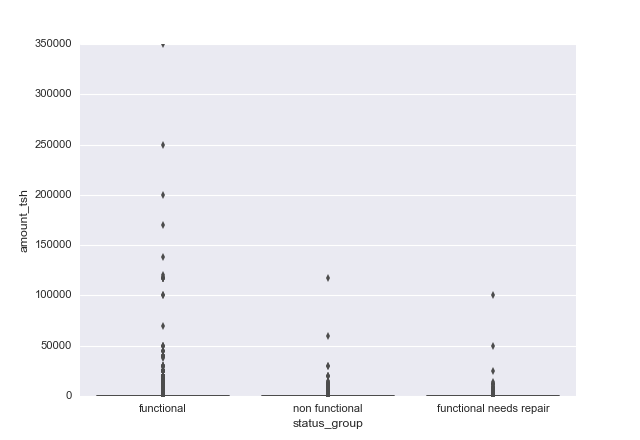

<IPython.core.display.Javascript object>


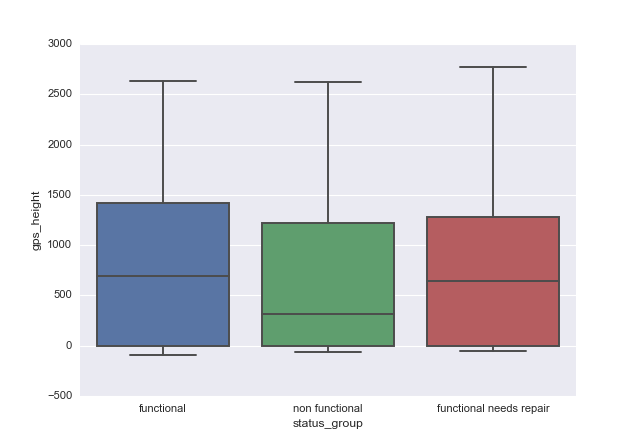

<IPython.core.display.Javascript object>


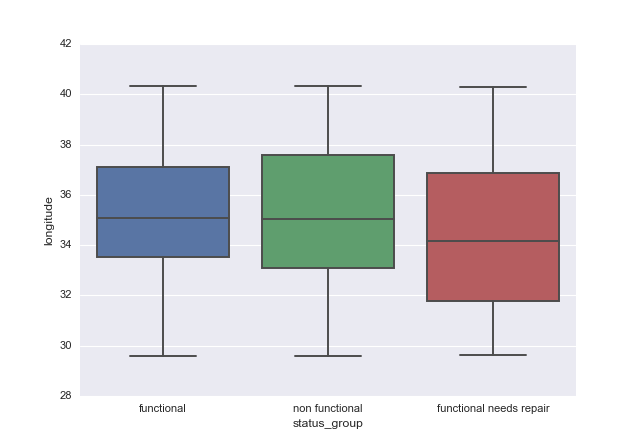

<IPython.core.display.Javascript object>


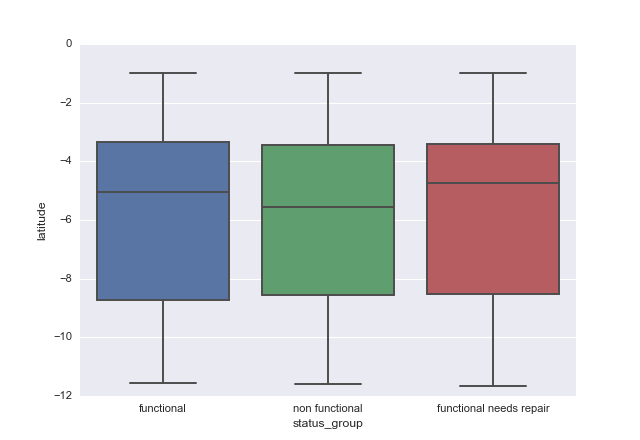

<IPython.core.display.Javascript object>


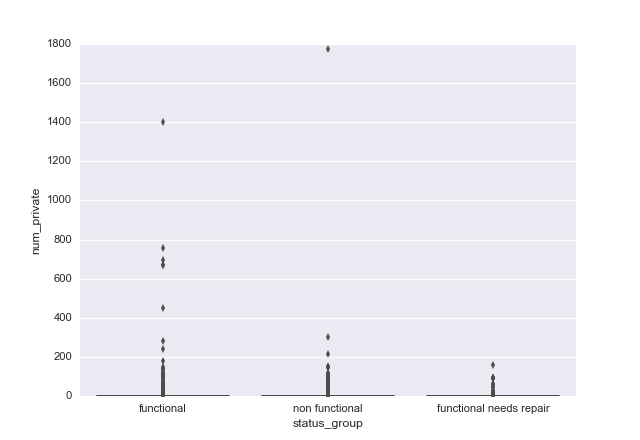

<IPython.core.display.Javascript object>


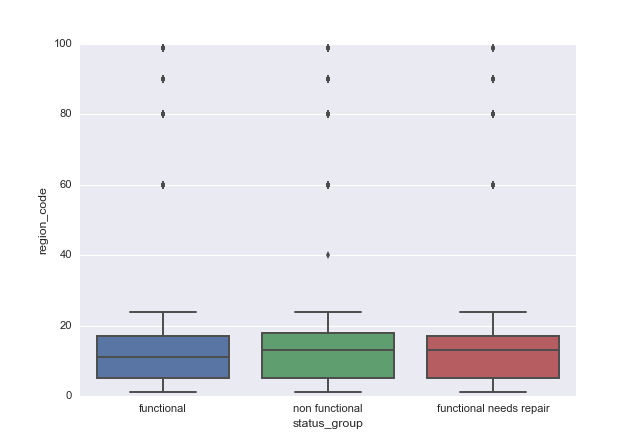

<IPython.core.display.Javascript object>


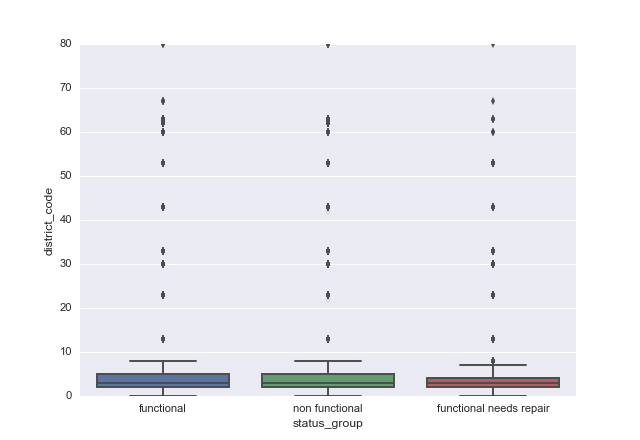

<IPython.core.display.Javascript object>


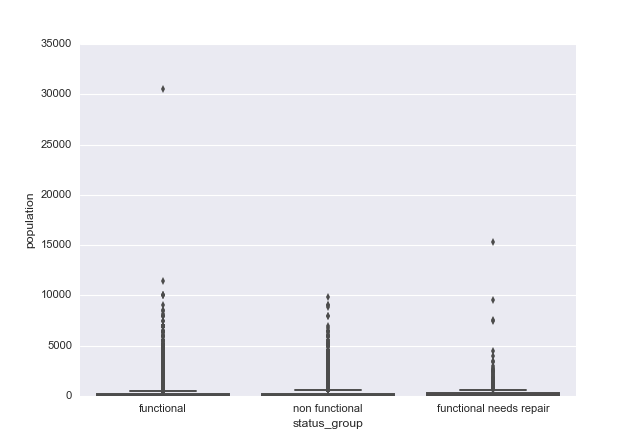

<IPython.core.display.Javascript object>


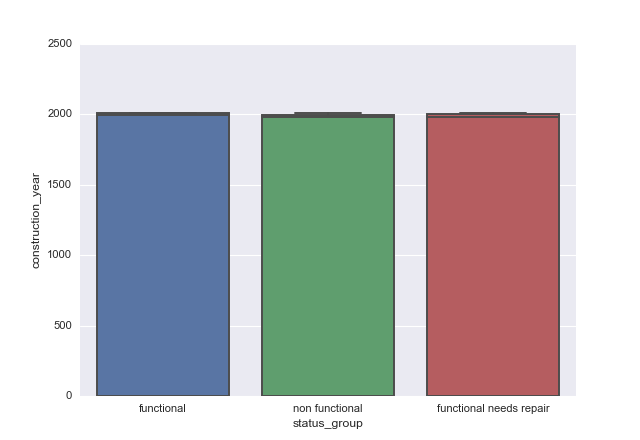

In [24]:
continuous_dtypes = data.columns[(data.dtypes == 'int64') | (data.dtypes == 'float64')]
for f in continuous_dtypes:
    plt.figure()
    sns.boxplot(x='status_group',y=f,data=data,)

<IPython.core.display.Javascript object>


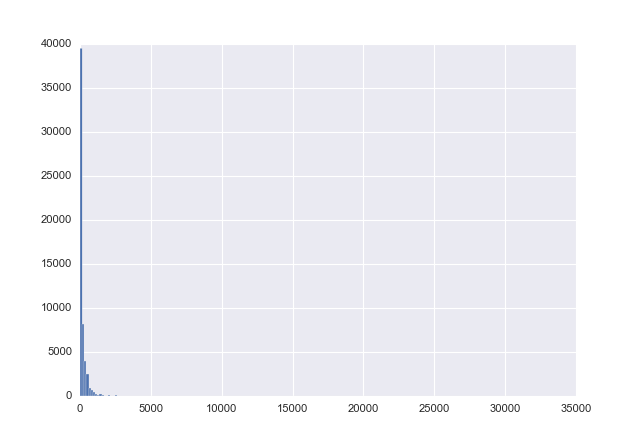

In [25]:
plt.figure()
plt.hist(data.population,bins=200)
print()

<IPython.core.display.Javascript object>


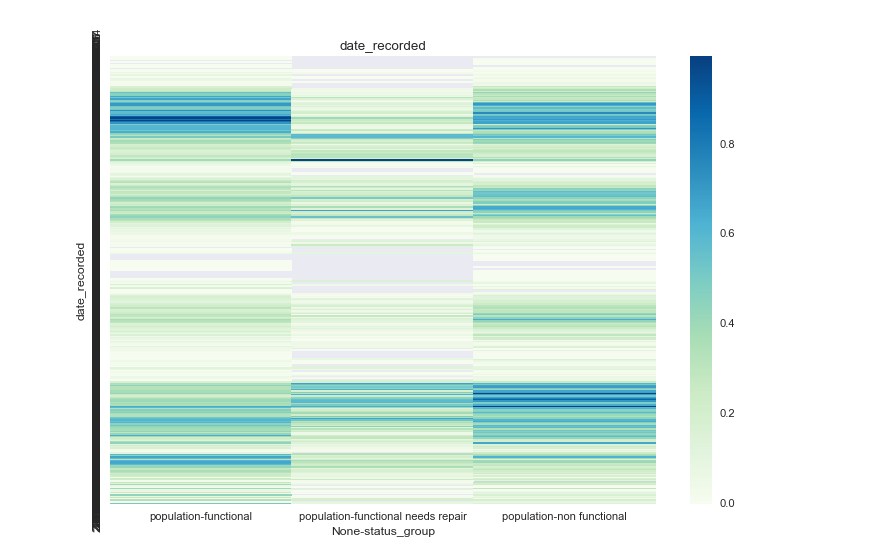

<IPython.core.display.Javascript object>


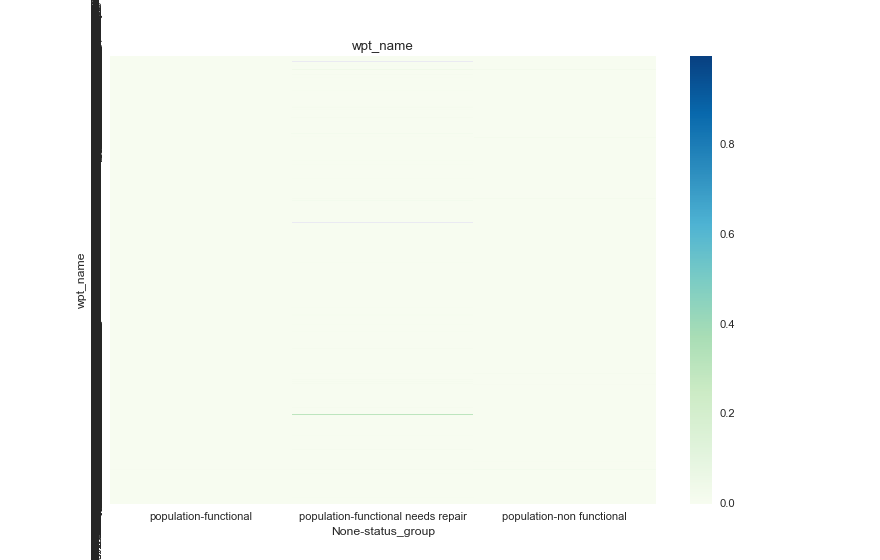

<IPython.core.display.Javascript object>


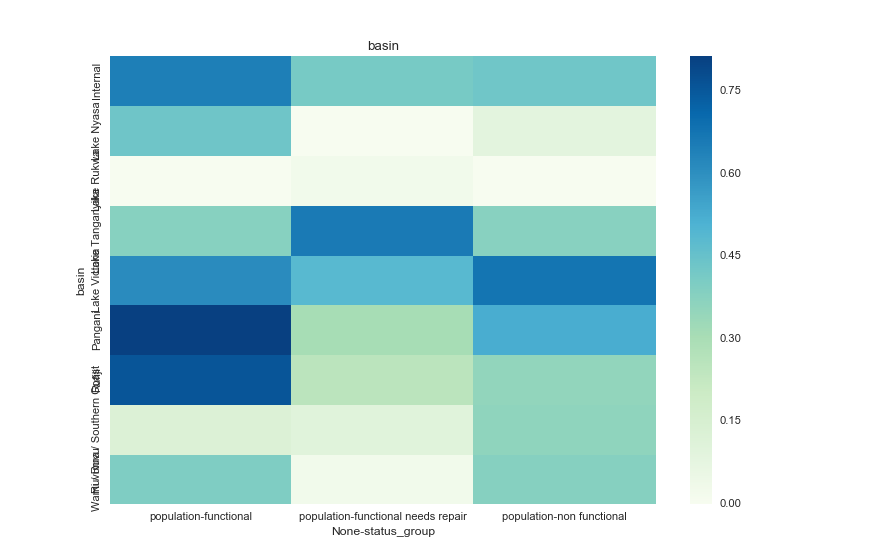

<IPython.core.display.Javascript object>


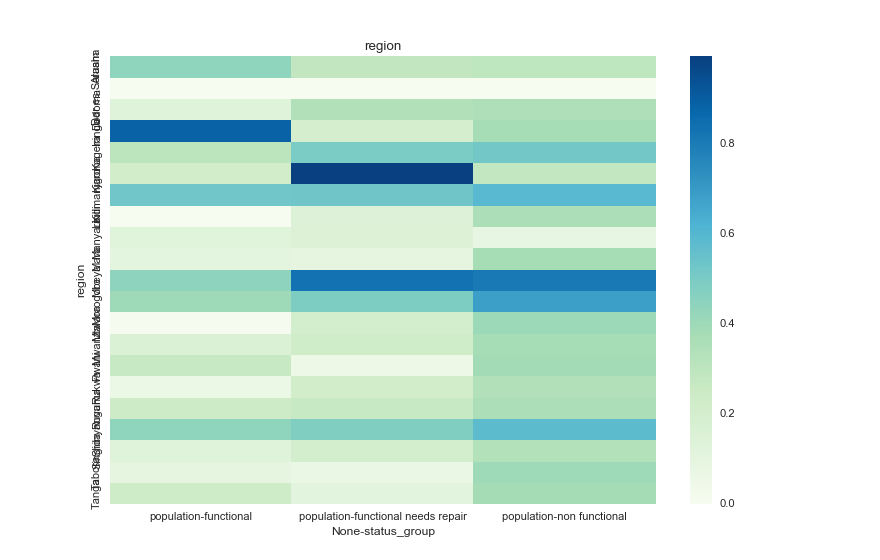

<IPython.core.display.Javascript object>


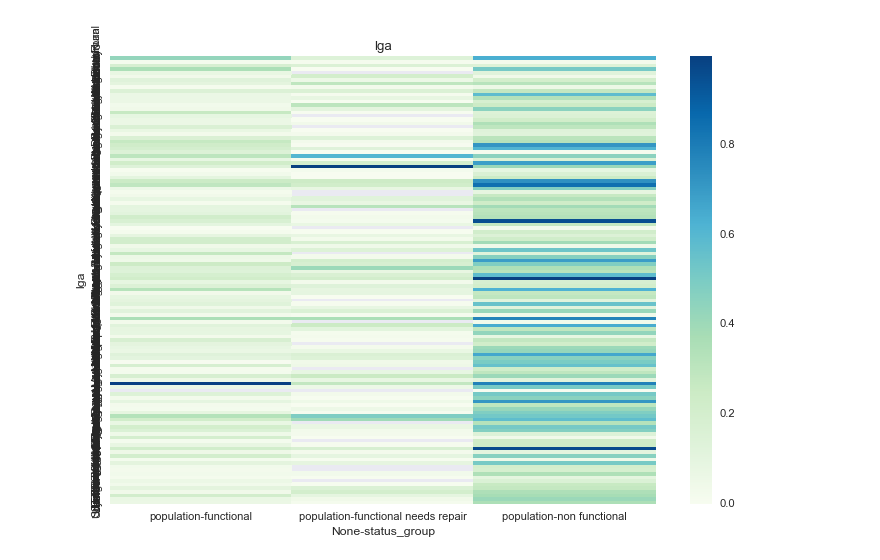

/Users/mustafa/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


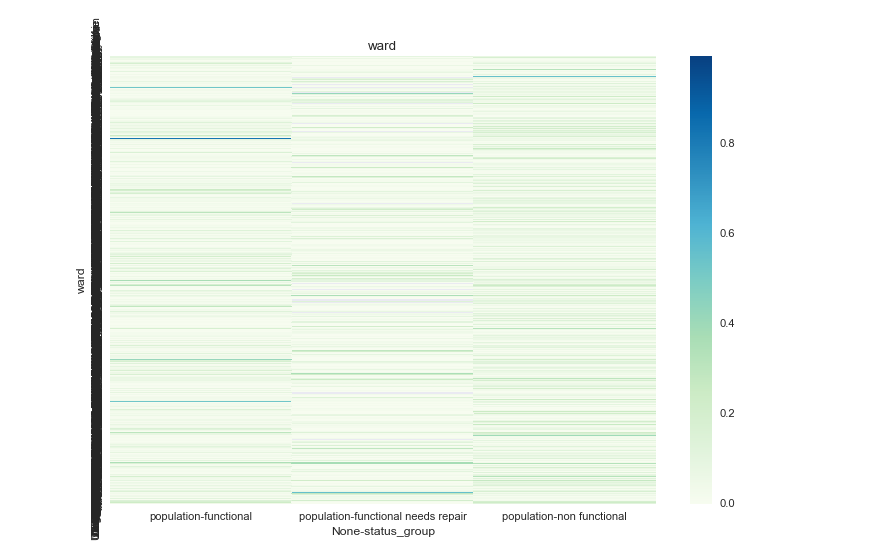

<IPython.core.display.Javascript object>


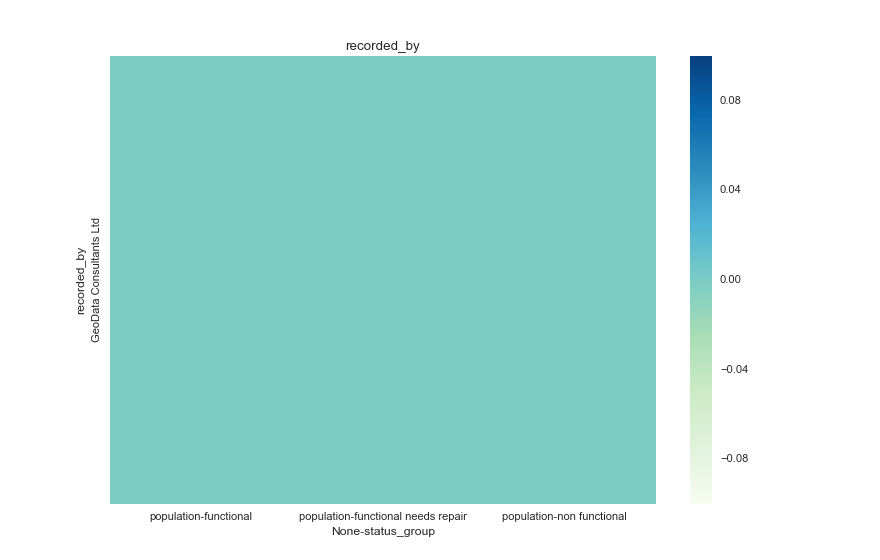

<IPython.core.display.Javascript object>


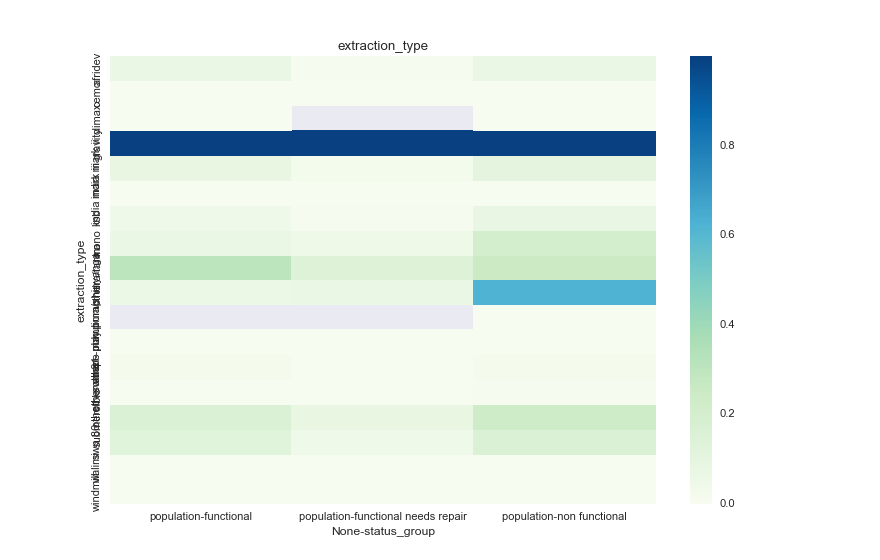

<IPython.core.display.Javascript object>


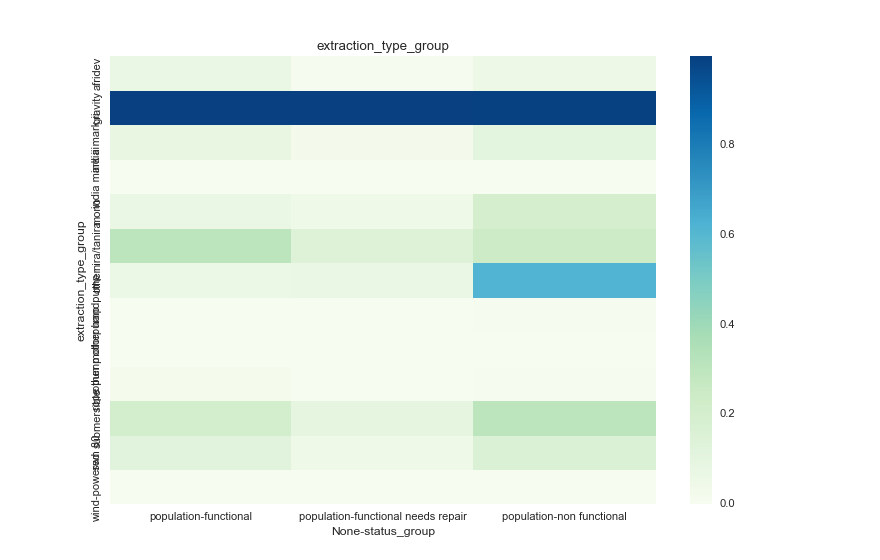

<IPython.core.display.Javascript object>


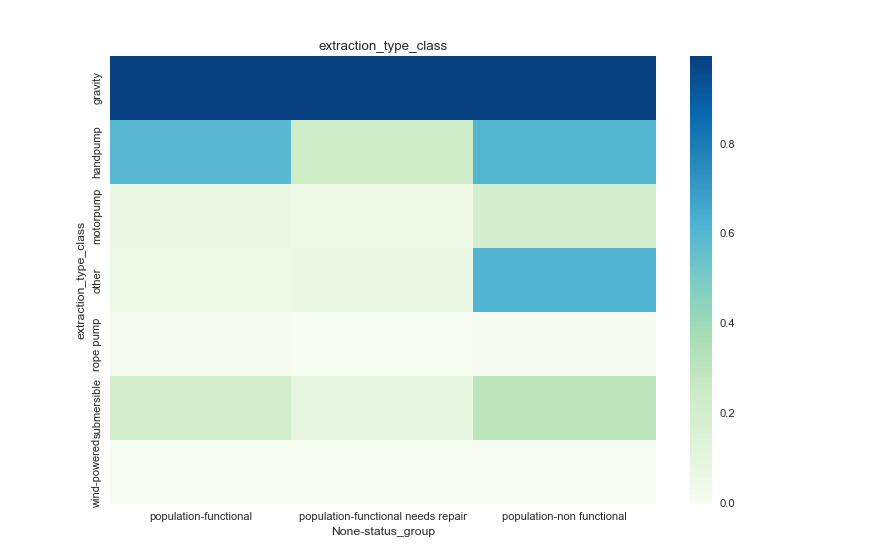

<IPython.core.display.Javascript object>


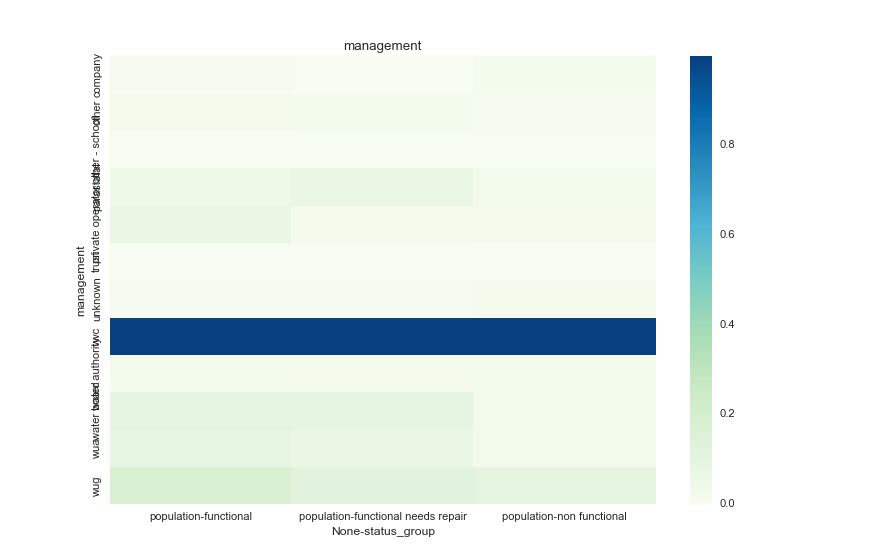

<IPython.core.display.Javascript object>


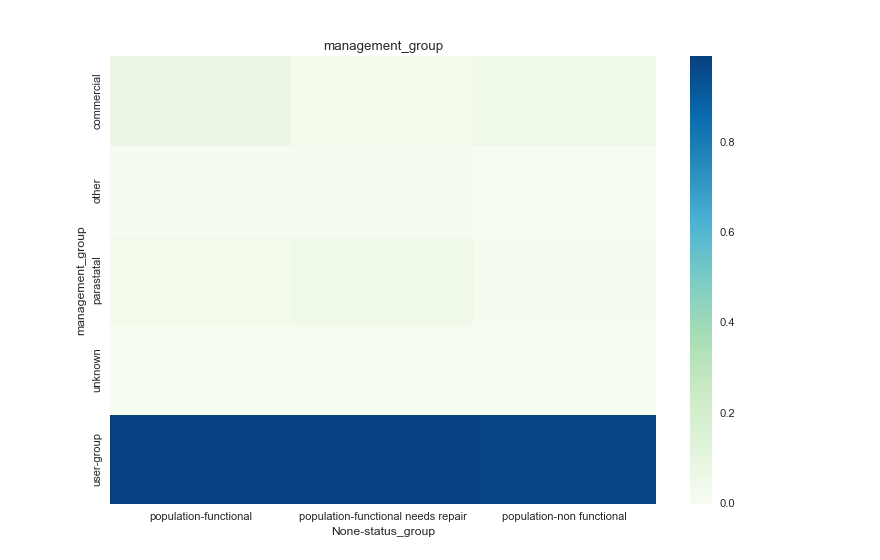

<IPython.core.display.Javascript object>


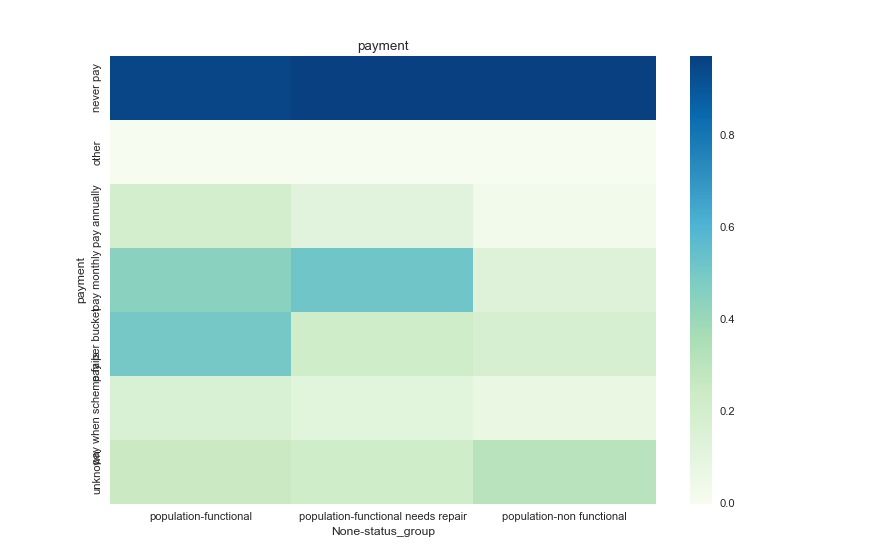

<IPython.core.display.Javascript object>


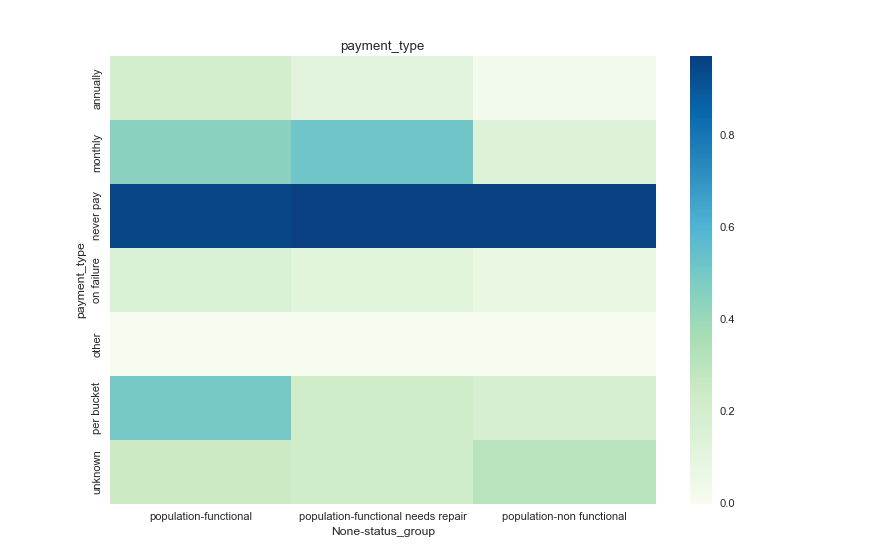

<IPython.core.display.Javascript object>


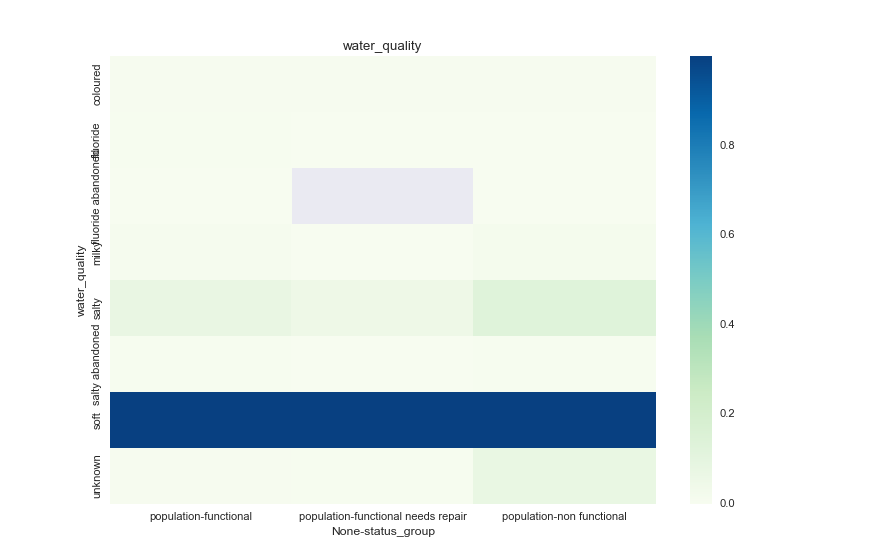

<IPython.core.display.Javascript object>


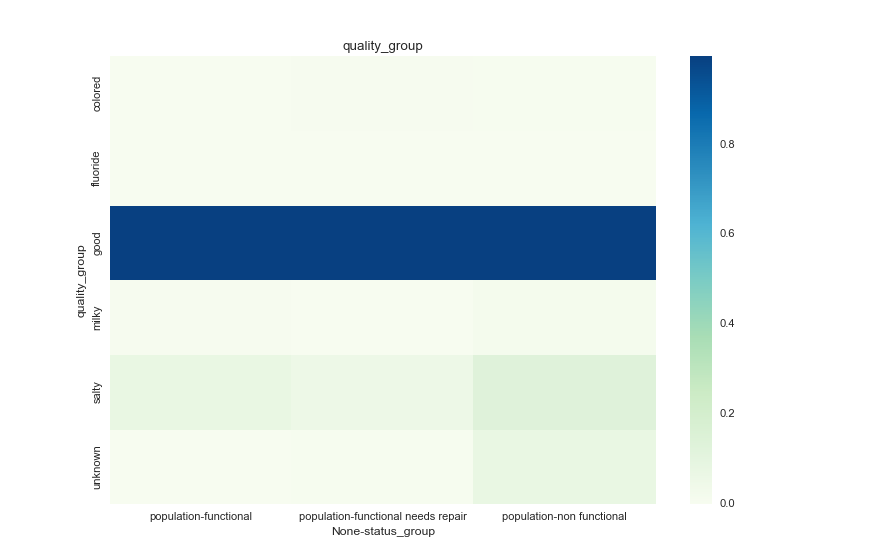

<IPython.core.display.Javascript object>


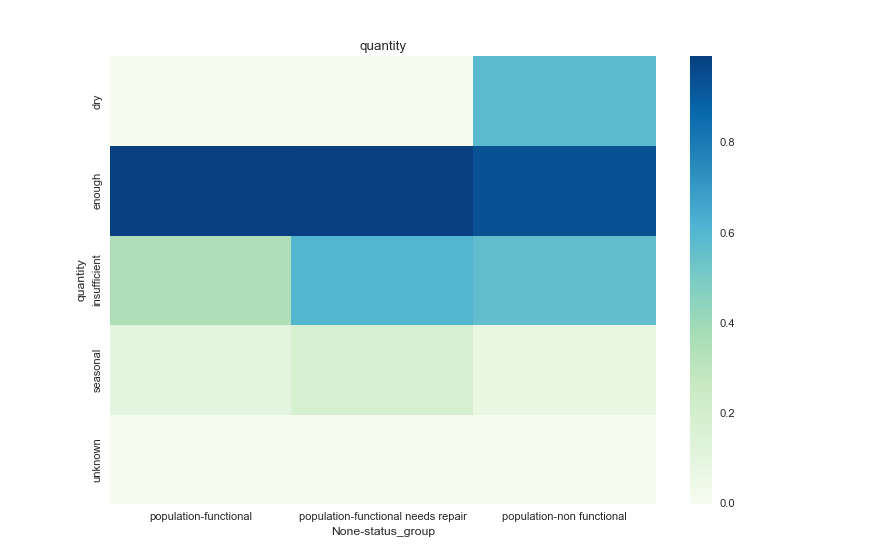

<IPython.core.display.Javascript object>


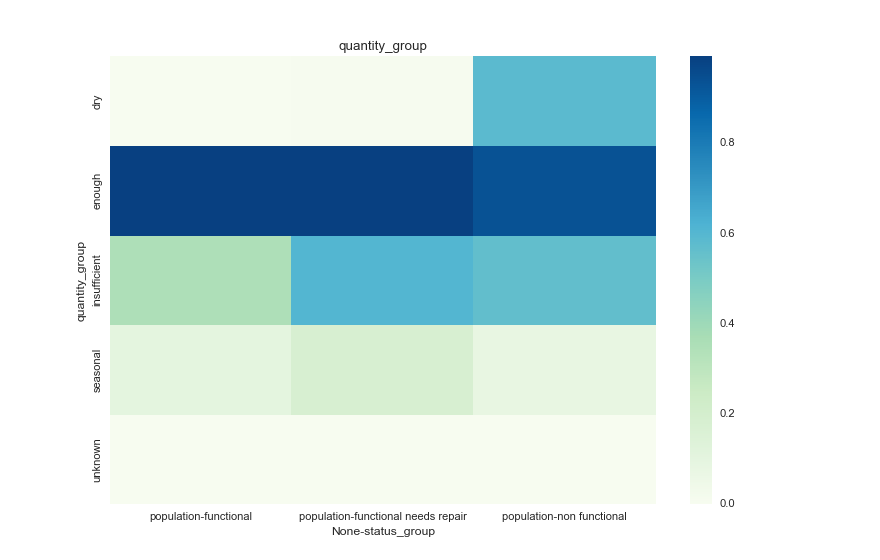

<IPython.core.display.Javascript object>


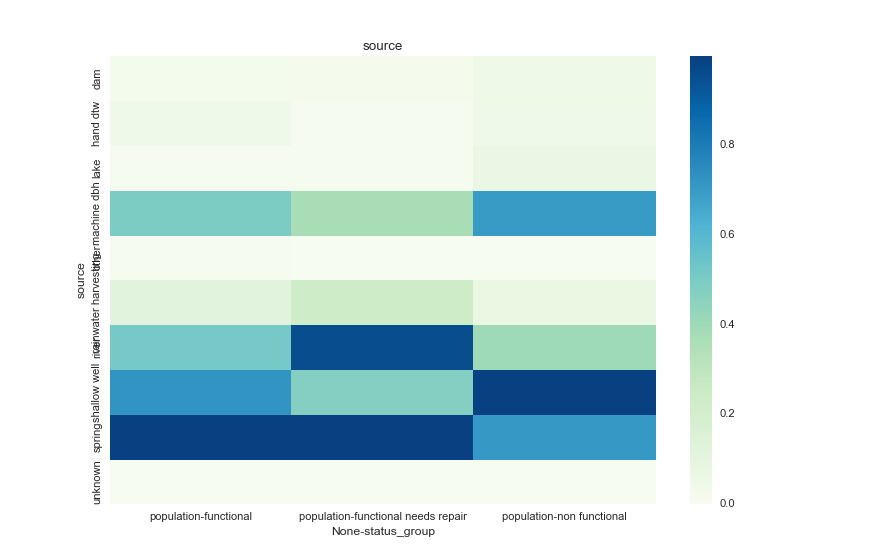

<IPython.core.display.Javascript object>


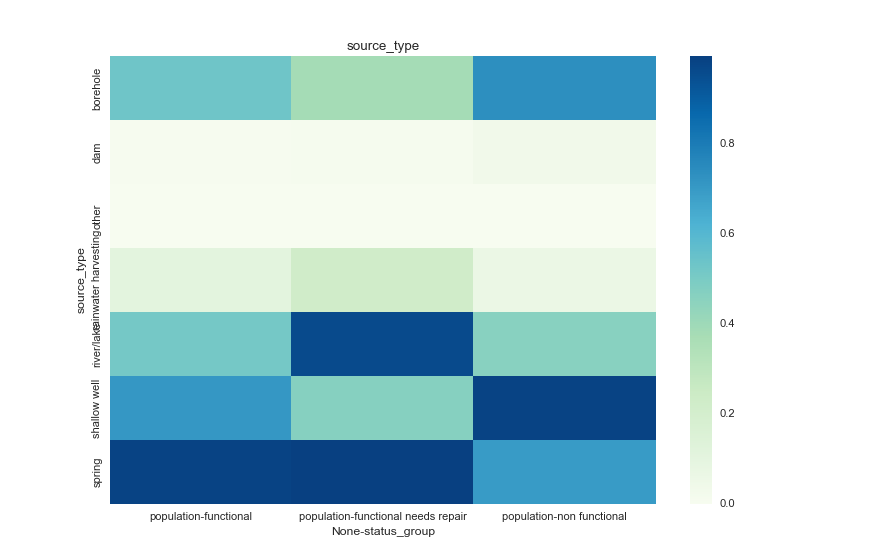

<IPython.core.display.Javascript object>


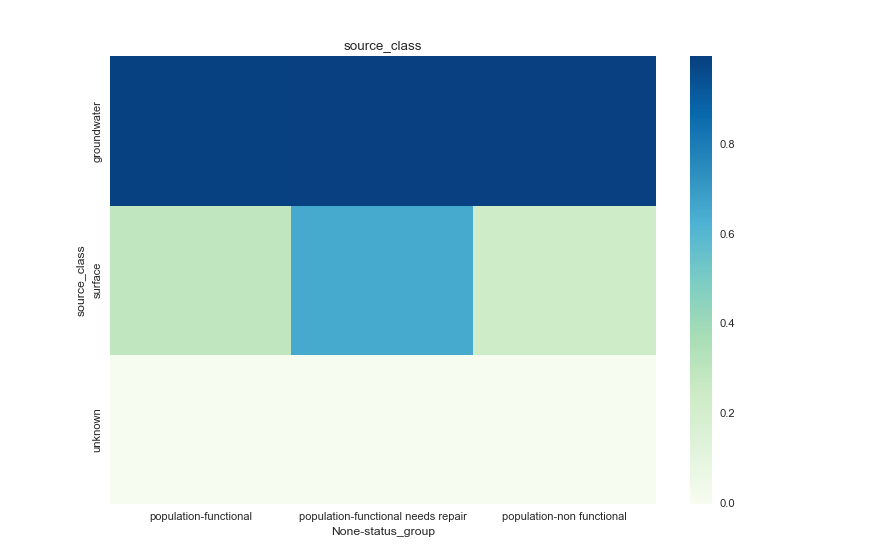

<IPython.core.display.Javascript object>


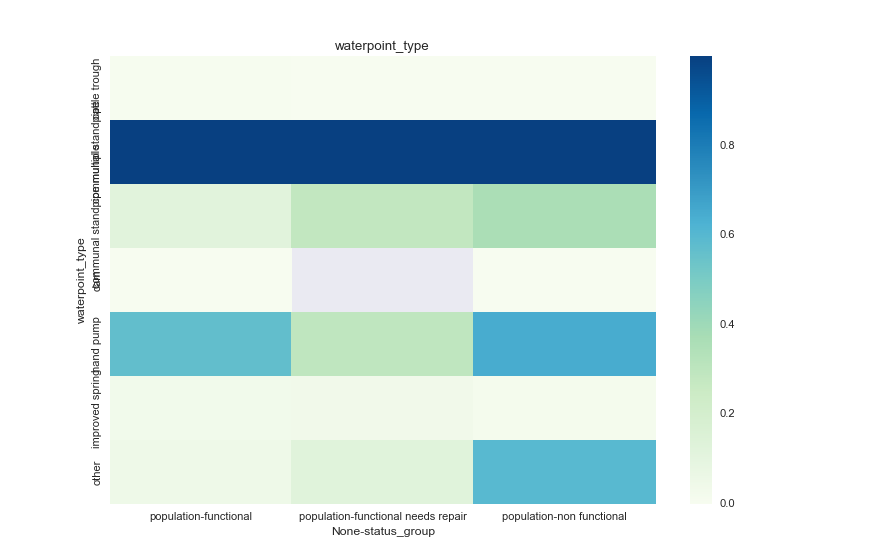

<IPython.core.display.Javascript object>


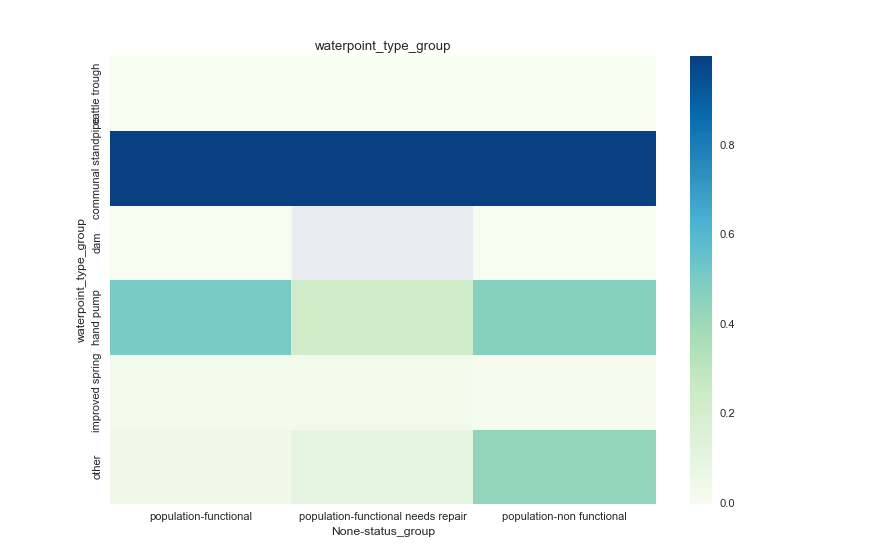

In [26]:
categorical_dtypes = data.columns[data.dtypes == 'object']
categorical_dtypes = [c for c in categorical_dtypes if c != 'status_group']

for target in categorical_dtypes:
    piv_df= data[[target,'status_group','population']]
    piv_table = piv_df.pivot_table(index=target,
                               columns='status_group', aggfunc='count')
    piv_table
    plt.figure(figsize=(11,7))
    sns.heatmap(piv_table.apply(lambda x: (x-x.min())/x.max(),axis=0), cmap='GnBu')
    plt.title(target)


# Conclusions on features:


### Selected features:

* #### Predictive continuous features:
    * gps_height
    * latitude
    * longitude
    * population
    * amount_tsh
    * <font color='red'>construction_year: we need to categorise it to deal with the unknown year class</font>
    
* #### Predictive discrete features:
    * <font color='red'>date_recorded: could yield a bias based on historical classification policy changes</font>
    * payment_type
    * management_group
    * quality_group
    * region
    * basin
    * extraction_type_class
    * quantity_group
    * waterpoint_type_group
    * source_type
    * source_class


### Discarded features:
 
* #### Features with too many classes and likely yield redundant predictive information over their generalised counterparts:
    * lga
    * wpt_name
    * ward
    * district_code
    * region_code
    * management
    * payment
    * water_quality
    * extraction_type
    * extraction_type_group
    * quantity (literally same classes as the group version)
    * waterpoint_type
    * source
    
* #### Features with too many NaN's (and not a clear value)
    * funder
    * installer
    * subvillage
    * public_meeting
    * scheme_management
    * scheme_name
    * permit
    
* #### Features with too little variation to be useful:
    * recorded_by
    
* #### Ill-defined features:
    * private_num

# Further ideas

### Model training idea's
* model with construction year, and another without construction year
* discretise years into "modern", "old" and "unknown"
* use adversarial training to remove effect of recorded_by or altitude/longitude
* auto-encoding to remove noise

### Pre-processing idea's
* feature: re-classify basin into river, lake and coast
* feature: distance to ocean/border
* feature: tsh_per_capita

### Productisation idea's
* deploy as a metaflow pipeline
* store data in SQL database
* Dash application?